In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

df = pd.read_csv("gisang.csv",encoding='cp949')

C:\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df.columns 

Index(['date', '11시강수확률', '11시최고기온', '11시최저기온', '11시 하늘 상태', '14시강수확률',
       '14시최고기온', '14시최저기온', '14시 하늘 상태', '일누적 자외선 A(MJ/m2)',
       '일최대 자외선 B(W/m2 )', '평균 오존전량(DU)', '미세먼지_10', '미세먼지_11', '미세먼지_12',
       '미세먼지_13', '미세먼지_14', '운량_10', '운량_11', '운량_12', '운량_13', '운량_14',
       '하루평균 미세먼지량', '하루누적 미세먼지량', '총자외선지수 일최고값'],
      dtype='object')

In [4]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
df_data = df.drop(['총자외선지수 일최고값'], axis=1)

# 다중 선형회귀분석
x_data = df[['11시강수확률', '11시최고기온', '11시최저기온', '11시 하늘 상태', '14시강수확률',
       '14시최고기온', '14시최저기온', '14시 하늘 상태', '일누적 자외선 A(MJ/m2)',
       '일최대 자외선 B(W/m2 )', '평균 오존전량(DU)', '미세먼지_10', '미세먼지_11', '미세먼지_12',
       '미세먼지_13', '미세먼지_14', '운량_10', '운량_11', '운량_12', '운량_13', '운량_14','하루평균 미세먼지량', '하루누적 미세먼지량']] #변수 여러개
y = df[['총자외선지수 일최고값']]

# for b0, 상수항 추가
x_data1 = sm.add_constant(x_data, has_constant = "add")

# OLS 검정
multi_model = sm.OLS(y, x_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()


C:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            총자외선지수 일최고값   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     4473.
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:30:37   Log-Likelihood:                 241.29
No. Observations:                 495   AIC:                            -434.6
Df Residuals:                     471   BIC:                            -333.7
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0707      0.095      0.746      0.456      -0.115       0.257
11시강수확률             -0.0018      0.001     -2.795      0.005      -0.003      -0.001
11시최고기온             -0.0142      0.041     -0.349      0.727      -0.094       0.066
11시최저기온              0.0733      0.020      3.586      0.000       0.033       0.113
11시 하늘 상태            0.0591      0.018      3.348      0.001       0.024       0.094
14시강수확률              0.0004      0.001      0.623      0.534      -0.001       0.002
14시최고기온              0.0207      0.041      0.510      0.610      -0.059       0.101
14시최저기온             -0.0811      0.020     -4.035      0.000      -0.121      -0.042
14시 하늘 상태           -0.0034      0.017     -0.198      0.843      -0.037       0.030
일누적 자외선 A(MJ/m2)     0.5807      0.046     12.623      0.000       0.490       0.671
일최대 자외선 B(W/m2 )    41.9050      0.210    199.863      0.000      41.493      42.317
평균 오존전량(DU)       -6.25e-05   6.68e-05     -0.935      0.350      -0.000    6.88e-05
미세먼지_10              0.0012      0.000      2.428      0.016       0.000       0.002
미세먼지_11             -0.0004      0.001     -0.409      0.683      -0.002       0.001
미세먼지_12              0.0004      0.001      0.369      0.712      -0.002       0.003
미세먼지_13             -0.0002      0.001     -0.167      0.868      -0.002       0.002
미세먼지_14             -0.0007      0.001     -0.811      0.418      -0.002       0.001
운량_10                0.0093      0.005      1.818      0.070      -0.001       0.019
운량_11                0.0057      0.007      0.847      0.397      -0.008       0.019
운량_12               -0.0072      0.007     -1.067      0.287      -0.020       0.006
운량_13                0.0024      0.007      0.338      0.735      -0.012       0.017
운량_14               -0.0070      0.006     -1.227      0.221      -0.018       0.004
하루평균 미세먼지량       -1.335e+06   1.09e+07     -0.122      0.903   -2.28e+07    2.02e+07
하루누적 미세먼지량         2.67e+05   2.19e+06      0.122      0.903   -4.04e+06    4.57e+06
==============================================================================
Omnibus:                      300.338   Durbin-Watson:                   1.533
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7306.065
Skew:                           2.162   Prob(JB):                         0.00
Kurtosis:                      21.318   Cond. No.                     6.23e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.86e-16. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  # VIF 다중공산성
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_data.values, i) for i in range(x_data.shape[1])]
vif["features"] = x_data.columns
vif
# 보통은 VIF가 10보다 크면 다중공선성이 있다고 판단 하루평균 미세먼지량이 infinite 로 가장 높은 vif를 가짐 
#변수를 하나씩 제거하면서 모델 확인 

C:\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,8.084423e+00,11시강수확률
1,2.654634e+04,11시최고기온
2,3.220371e+03,11시최저기온
3,5.475271e+01,11시 하늘 상태
4,9.903263e+00,14시강수확률
5,2.639668e+04,14시최고기온
6,3.015734e+03,14시최저기온
7,4.930986e+01,14시 하늘 상태
8,4.357127e+01,일누적 자외선 A(MJ/m2)
9,3.043944e+01,일최대 자외선 B(W/m2 )


In [6]:
vif = pd.DataFrame()
x_data2 = x_data.drop("하루평균 미세먼지량",axis=1)
vif["VIF Factor"] = [variance_inflation_factor(x_data2.values, i) for i in range(x_data2.shape[1])]
vif["features"] = x_data2.columns
vif

,VIF Factor,features
0,8.073143,11시강수확률
1,26384.983981,11시최고기온
2,3208.131581,11시최저기온
3,54.752651,11시 하늘 상태
4,9.897790,14시강수확률
5,26246.025953,14시최고기온
6,3004.453556,14시최저기온
7,49.210105,14시 하늘 상태
8,43.524375,일누적 자외선 A(MJ/m2)
9,30.421289,일최대 자외선 B(W/m2 )


In [7]:
vif = pd.DataFrame()
x_data3 = x_data2.drop("11시최고기온",axis=1) #그다음높은 11시 최고기온 제거 
vif["VIF Factor"] = [variance_inflation_factor(x_data3.values, i) for i in range(x_data3.shape[1])]
vif["features"] = x_data3.columns
vif

,VIF Factor,features
0,8.062514,11시강수확률
1,3207.513291,11시최저기온
2,54.717415,11시 하늘 상태
3,9.865173,14시강수확률
4,106.703165,14시최고기온
5,3003.505833,14시최저기온
6,49.159796,14시 하늘 상태
7,43.329007,일누적 자외선 A(MJ/m2)
8,30.401622,일최대 자외선 B(W/m2 )
9,7.986389,평균 오존전량(DU)


In [8]:
vif = pd.DataFrame()
x_data4 = x_data3.drop("11시최저기온",axis=1) #그다음높은 11시 최고기온 제거 
vif["VIF Factor"] = [variance_inflation_factor(x_data4.values, i) for i in range(x_data4.shape[1])]
vif["features"] = x_data4.columns
vif

,VIF Factor,features
0,8.041403,11시강수확률
1,54.694437,11시 하늘 상태
2,9.815864,14시강수확률
3,102.143300,14시최고기온
4,67.689531,14시최저기온
5,49.117327,14시 하늘 상태
6,43.328865,일누적 자외선 A(MJ/m2)
7,30.218090,일최대 자외선 B(W/m2 )
8,7.878760,평균 오존전량(DU)
9,8.425544,미세먼지_10


In [9]:
vif = pd.DataFrame()
x_data5 = x_data4.drop("14시최고기온",axis=1) 
vif["VIF Factor"] = [variance_inflation_factor(x_data5.values, i) for i in range(x_data5.shape[1])]
vif["features"] = x_data5.columns
vif

,VIF Factor,features
0,8.020803,11시강수확률
1,54.693450,11시 하늘 상태
2,9.658717,14시강수확률
3,24.488374,14시최저기온
4,48.521607,14시 하늘 상태
5,38.209220,일누적 자외선 A(MJ/m2)
6,30.171459,일최대 자외선 B(W/m2 )
7,7.560797,평균 오존전량(DU)
8,8.367578,미세먼지_10
9,31.260525,미세먼지_11


In [50]:
vif = pd.DataFrame()
x_data6 = x_data5.drop("11시 하늘 상태",axis=1)
vif["VIF Factor"] = [variance_inflation_factor(x_data6.values, i) for i in range(x_data6.shape[1])]
vif["features"] = x_data6.columns
vif

,VIF Factor,features
0,6.900707,11시강수확률
1,8.948224,14시강수확률
2,15.394792,14시최저기온
3,25.834824,14시 하늘 상태
4,5.165124,평균 오존전량(DU)
5,8.351505,미세먼지_10
6,30.315301,미세먼지_11
7,41.210036,미세먼지_12
8,29.429294,미세먼지_13
9,25.194916,미세먼지_14


In [51]:
vif = pd.DataFrame()
x_data7 = x_data6.drop("일누적 자외선 A(MJ/m2)",axis=1)
vif["VIF Factor"] = [variance_inflation_factor(x_data7.values, i) for i in range(x_data7.shape[1])]
vif["features"] = x_data7.columns
vif

KeyError: "['일누적 자외선 A(MJ/m2)'] not found in axis"

In [52]:
vif = pd.DataFrame()
x_data8 = x_data7.drop("운량_13",axis=1) 
vif["VIF Factor"] = [variance_inflation_factor(x_data8.values, i) for i in range(x_data8.shape[1])]
vif["features"] = x_data8.columns
vif

KeyError: "['운량_13'] not found in axis"

In [53]:
vif = pd.DataFrame()
x_data9 = x_data8.drop("운량_11",axis=1) 
vif["VIF Factor"] = [variance_inflation_factor(x_data9.values, i) for i in range(x_data9.shape[1])]
vif["features"] = x_data9.columns
vif

KeyError: "['운량_11'] not found in axis"

In [54]:
vif = pd.DataFrame()
x_data10 = x_data9.drop("미세먼지_12",axis=1)
vif["VIF Factor"] = [variance_inflation_factor(x_data10.values, i) for i in range(x_data10.shape[1])]
vif["features"] = x_data10.columns
vif

KeyError: "['미세먼지_12'] not found in axis"

In [55]:
vif = pd.DataFrame()
x_data11 = x_data10.drop("14시 하늘 상태",axis=1)
vif["VIF Factor"] = [variance_inflation_factor(x_data11.values, i) for i in range(x_data11.shape[1])]
vif["features"] = x_data11.columns
vif

KeyError: "['14시 하늘 상태'] not found in axis"

In [56]:
vif = pd.DataFrame()
x_data12 = x_data11.drop("미세먼지_14",axis=1) 
vif["VIF Factor"] = [variance_inflation_factor(x_data12.values, i) for i in range(x_data12.shape[1])]
vif["features"] = x_data12.columns
vif

KeyError: "['미세먼지_14'] not found in axis"

In [57]:
vif = pd.DataFrame()
x_data13 = x_data12.drop("운량_12",axis=1) 
vif["VIF Factor"] = [variance_inflation_factor(x_data13.values, i) for i in range(x_data13.shape[1])]
vif["features"] = x_data13.columns
vif

KeyError: "['운량_12'] not found in axis"

In [58]:
vif = pd.DataFrame()
x_data14 = x_data13.drop("14시최저기온",axis=1) #그다음높은 14시 최저기온 제거 
vif["VIF Factor"] = [variance_inflation_factor(x_data14.values, i) for i in range(x_data14.shape[1])]
vif["features"] = x_data14.columns
vif

,VIF Factor,features
0,6.755593,11시강수확률
1,6.418957,14시강수확률
2,4.048775,평균 오존전량(DU)
3,5.766512,미세먼지_10
4,5.822287,미세먼지_13
5,8.300228,운량_10
6,9.522900,운량_14
7,2.956625,하루누적 미세먼지량


In [59]:
vif = pd.DataFrame()
x_data15 = x_data14.drop("미세먼지_11",axis=1) 
vif["VIF Factor"] = [variance_inflation_factor(x_data15.values, i) for i in range(x_data15.shape[1])]
vif["features"] = x_data15.columns
vif # vif가 모두 10보다 작으므로 다중공산성 문제가 해결되었다고 볼수있다 

KeyError: "['미세먼지_11'] not found in axis"

In [60]:
#위에 해당하는 변수들을 가지고 new dataframe생성
df1 = df[['date','11시강수확률', '14시강수확률',
       '일최대 자외선 B(W/m2 )', '평균 오존전량(DU)', '미세먼지_10',
       '미세먼지_13', '운량_10', '운량_14','하루누적 미세먼지량', '총자외선지수 일최고값']]

In [61]:
x_data15_ = sm.add_constant(x_data15, has_constant = "add") #상수항추가

C:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [62]:
from sklearn.model_selection import train_test_split

X = x_data15_
y = y

train_x, test_x, train_y, test_y = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 1)
# 학습데이터와 검증데이터를 7:3으로 분리한다.
# random_state고정을 통해 그때마다 똑같은 값을 분류하도록 한다.

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(346, 10) (149, 10) (346, 1) (149, 1)


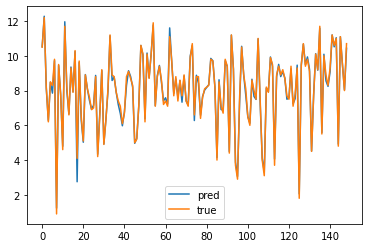

In [63]:
import matplotlib.pyplot as plt
fit_train1 = sm.OLS(train_y,train_x)
fit_train1 = fit_train1.fit()

# 검증데이터에 대한 예측값과 true값 비교

plt.plot(np.array(fit_train1.predict(test_x)),label = "pred")
plt.plot(np.array(test_y),label = "true")
plt.legend()
plt.show() # 잘 적함됨을 확인 할 수있다 

In [64]:
fit_train1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            총자외선지수 일최고값   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     6396.
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        18:01:57   Log-Likelihood:                 119.26
No. Observations:                 346   AIC:                            -218.5
Df Residuals:                     336   BIC:                            -180.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4822      0.058      8.362      0.000       0.369       0.596
11시강수확률             -0.0003      0.001     -0.384      0.702      -0.002       0.001
14시강수확률             -0.0004      0.001     -0.487      0.627      -0.002       0.001
일최대 자외선 B(W/m2 )    43.6360      0.203    215.167      0.000      43.237      44.035
평균 오존전량(DU)          0.0003   8.34e-05      3.298      0.001       0.000       0.000
미세먼지_10              0.0009      0.000      1.860      0.064   -5.29e-05       0.002
미세먼지_13              0.0001      0.001      0.247      0.805      -0.001       0.001
운량_10             8.281e-05      0.004      0.019      0.985      -0.008       0.008
운량_14               -0.0165      0.005     -3.624      0.000      -0.026      -0.008
하루누적 미세먼지량        9.091e-05   6.97e-05      1.305      0.193   -4.61e-05       0.000
==============================================================================
Omnibus:                      183.473   Durbin-Watson:                   2.222
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3676.740
Skew:                           1.732   Prob(JB):                         0.00
Kurtosis:                      18.590   Cond. No.                     8.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(train_x,train_y) 
print(mlr.coef_)
print(mlr.intercept_)

[[ 0.00000000e+00 -3.16770112e-04 -3.69813566e-04  4.36360167e+01
   2.74926656e-04  9.19393052e-04  1.27498620e-04  8.28128956e-05
  -1.65434173e-02  9.09070584e-05]]
[0.48223609]


In [66]:
print(mlr.score(train_x, train_y)) #모델의 결정계수확인 : 0.99로 매우 높다 

0.9941972452311189


In [67]:
# 일최대 자외선이 가장 높은 회귀계수를 갖고 있고 나머지 변수들은 현저히 회귀계수가 낮으므로 정확환 관계를 보기 위해 일최대 자외선을 빼고 다중회귀 진행 
x_data = df[['11시강수확률', '11시최고기온', '11시최저기온', '11시 하늘 상태', '14시강수확률',
       '14시최고기온', '14시최저기온', '14시 하늘 상태', '평균 오존전량(DU)', '미세먼지_10', '미세먼지_11', '미세먼지_12',
       '미세먼지_13', '미세먼지_14', '운량_10', '운량_11', '운량_12', '운량_13', '운량_14','하루평균 미세먼지량', '하루누적 미세먼지량']] #변수 여러개
y = df[['총자외선지수 일최고값']]

# for b0, 상수항 추가
x_data1 = sm.add_constant(x_data, has_constant = "add")

# OLS 검정
multi_model = sm.OLS(y, x_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

C:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            총자외선지수 일최고값   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     9.706
Date:                Tue, 02 Aug 2022   Prob (F-statistic):           7.51e-26
Time:                        18:01:57   Log-Likelihood:                -1004.3
No. Observations:                 495   AIC:                             2053.
Df Residuals:                     473   BIC:                             2145.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.6838      1.110      6.019      0.000       4.502       8.866
11시강수확률        -0.0135      0.008     -1.709      0.088      -0.029       0.002
11시최고기온         0.8570      0.502      1.708      0.088      -0.129       1.843
11시최저기온         0.5540      0.252      2.202      0.028       0.060       1.048
11시 하늘 상태       0.0675      0.218      0.309      0.757      -0.361       0.497
14시강수확률        -0.0260      0.008     -3.182      0.002      -0.042      -0.010
14시최고기온        -0.8830      0.501     -1.764      0.078      -1.867       0.101
14시최저기온        -0.3883      0.248     -1.565      0.118      -0.876       0.099
14시 하늘 상태       0.3276      0.209      1.570      0.117      -0.082       0.738
평균 오존전량(DU)     0.0031      0.001      4.026      0.000       0.002       0.005
미세먼지_10        -0.0003      0.006     -0.056      0.956      -0.012       0.011
미세먼지_11        -0.0028      0.012     -0.240      0.810      -0.026       0.020
미세먼지_12         0.0076      0.013      0.571      0.568      -0.019       0.034
미세먼지_13        -0.0087      0.011     -0.778      0.437      -0.031       0.013
미세먼지_14        -0.0087      0.010     -0.846      0.398      -0.029       0.012
운량_10          -0.0700      0.063     -1.114      0.266      -0.193       0.053
운량_11          -0.0081      0.083     -0.097      0.923      -0.172       0.156
운량_12           0.1036      0.082      1.258      0.209      -0.058       0.266
운량_13          -0.2049      0.088     -2.324      0.021      -0.378      -0.032
운량_14          -0.0586      0.069     -0.847      0.398      -0.195       0.077
하루평균 미세먼지량    6.94e+07   1.35e+08      0.513      0.608   -1.96e+08    3.35e+08
하루누적 미세먼지량  -1.388e+07    2.7e+07     -0.513      0.608    -6.7e+07    3.93e+07
==============================================================================
Omnibus:                        2.999   Durbin-Watson:                   1.316
Prob(Omnibus):                  0.223   Jarque-Bera (JB):                2.828
Skew:                           0.136   Prob(JB):                        0.243
Kurtosis:                       3.251   Cond. No.                     6.23e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.86e-16. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  # VIF 다중공산성
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_data.values, i) for i in range(x_data.shape[1])]
vif["features"] = x_data.columns
vif
# 보통은 VIF가 10보다 크면 다중공선성이 있다고 판단 하루평균 미세먼지량이 infinite 로 가장 높은 vif를 가짐 
#변수를 하나씩 제거하면서 모델 확인 

C:\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,8.037016e+00,11시강수확률
1,2.621054e+04,11시최고기온
2,3.184402e+03,11시최저기온
3,5.462085e+01,11시 하늘 상태
4,9.665355e+00,14시강수확률
5,2.621264e+04,14시최고기온
6,2.978841e+03,14시최저기온
7,4.765858e+01,14시 하늘 상태
8,6.834925e+00,평균 오존전량(DU)
9,8.460945e+00,미세먼지_10


In [69]:
vif = pd.DataFrame()
x_data2 = x_data.drop("하루평균 미세먼지량",axis=1)
vif["VIF Factor"] = [variance_inflation_factor(x_data2.values, i) for i in range(x_data2.shape[1])]
vif["features"] = x_data2.columns
vif

,VIF Factor,features
0,8.026630,11시강수확률
1,26041.628313,11시최고기온
2,3172.053314,11시최저기온
3,54.620677,11시 하늘 상태
4,9.660828,14시강수확률
5,26057.250960,14시최고기온
6,2967.676460,14시최저기온
7,47.570248,14시 하늘 상태
8,6.834267,평균 오존전량(DU)
9,8.384950,미세먼지_10


In [70]:
vif = pd.DataFrame()
x_data3 = x_data2.drop("14시최고기온",axis=1) #그다음높은 14시 최저기온 제거 
vif["VIF Factor"] = [variance_inflation_factor(x_data3.values, i) for i in range(x_data3.shape[1])]
vif["features"] = x_data3.columns
vif

,VIF Factor,features
0,8.020523,11시강수확률
1,83.271060,11시최고기온
2,3170.846978,11시최저기온
3,54.594737,11시 하늘 상태
4,9.622978,14시강수확률
5,2967.036533,14시최저기온
6,47.426423,14시 하늘 상태
7,6.787544,평균 오존전량(DU)
8,8.384945,미세먼지_10
9,31.069520,미세먼지_11


In [71]:
vif = pd.DataFrame()
x_data4 = x_data3.drop("11시최저기온",axis=1) #그다음높은 11시 최저기온 제거 
vif["VIF Factor"] = [variance_inflation_factor(x_data4.values, i) for i in range(x_data4.shape[1])]
vif["features"] = x_data4.columns
vif

,VIF Factor,features
0,8.003926,11시강수확률
1,77.003476,11시최고기온
2,54.580633,11시 하늘 상태
3,9.590786,14시강수확률
4,66.621989,14시최저기온
5,47.417518,14시 하늘 상태
6,6.716676,평균 오존전량(DU)
7,8.384734,미세먼지_10
8,30.811892,미세먼지_11
9,41.545453,미세먼지_12


In [72]:
vif = pd.DataFrame()
x_data5 = x_data4.drop("11시최고기온",axis=1) #그다음높은 11시 최고기온 제거 
vif["VIF Factor"] = [variance_inflation_factor(x_data5.values, i) for i in range(x_data5.shape[1])]
vif["features"] = x_data5.columns
vif

,VIF Factor,features
0,8.000526,11시강수확률
1,54.534699,11시 하늘 상태
2,9.037378,14시강수확률
3,16.323403,14시최저기온
4,47.398132,14시 하늘 상태
5,5.221752,평균 오존전량(DU)
6,8.351698,미세먼지_10
7,30.401091,미세먼지_11
8,41.418091,미세먼지_12
9,29.440262,미세먼지_13


In [73]:
vif = pd.DataFrame()
x_data6 = x_data5.drop("11시 하늘 상태",axis=1)
vif["VIF Factor"] = [variance_inflation_factor(x_data6.values, i) for i in range(x_data6.shape[1])]
vif["features"] = x_data6.columns
vif

,VIF Factor,features
0,6.900707,11시강수확률
1,8.948224,14시강수확률
2,15.394792,14시최저기온
3,25.834824,14시 하늘 상태
4,5.165124,평균 오존전량(DU)
5,8.351505,미세먼지_10
6,30.315301,미세먼지_11
7,41.210036,미세먼지_12
8,29.429294,미세먼지_13
9,25.194916,미세먼지_14


In [74]:
vif = pd.DataFrame()
x_data7 = x_data6.drop("운량_13",axis=1) 
vif["VIF Factor"] = [variance_inflation_factor(x_data7.values, i) for i in range(x_data7.shape[1])]
vif["features"] = x_data7.columns
vif

,VIF Factor,features
0,6.884886,11시강수확률
1,8.939466,14시강수확률
2,15.319697,14시최저기온
3,25.651605,14시 하늘 상태
4,5.145100,평균 오존전량(DU)
5,8.326207,미세먼지_10
6,30.311902,미세먼지_11
7,41.136802,미세먼지_12
8,29.391646,미세먼지_13
9,25.156423,미세먼지_14


In [75]:
vif = pd.DataFrame()
x_data8 = x_data7.drop("운량_11",axis=1)
vif["VIF Factor"] = [variance_inflation_factor(x_data8.values, i) for i in range(x_data8.shape[1])]
vif["features"] = x_data8.columns
vif

,VIF Factor,features
0,6.865972,11시강수확률
1,8.938337,14시강수확률
2,15.277157,14시최저기온
3,25.304982,14시 하늘 상태
4,5.138263,평균 오존전량(DU)
5,8.326107,미세먼지_10
6,30.297828,미세먼지_11
7,41.136802,미세먼지_12
8,29.385959,미세먼지_13
9,25.133857,미세먼지_14


In [76]:
vif = pd.DataFrame()
x_data9 = x_data8.drop("미세먼지_12",axis=1)
vif["VIF Factor"] = [variance_inflation_factor(x_data9.values, i) for i in range(x_data9.shape[1])]
vif["features"] = x_data9.columns
vif

,VIF Factor,features
0,6.854286,11시강수확률
1,8.919147,14시강수확률
2,15.251988,14시최저기온
3,25.163970,14시 하늘 상태
4,5.137940,평균 오존전량(DU)
5,8.316287,미세먼지_10
6,17.785294,미세먼지_11
7,24.407504,미세먼지_13
8,24.879492,미세먼지_14
9,14.253345,운량_10


In [77]:
vif = pd.DataFrame()
x_data10 = x_data9.drop("14시 하늘 상태",axis=1) 
vif["VIF Factor"] = [variance_inflation_factor(x_data10.values, i) for i in range(x_data10.shape[1])]
vif["features"] = x_data10.columns
vif

,VIF Factor,features
0,6.851133,11시강수확률
1,6.455378,14시강수확률
2,9.869306,14시최저기온
3,4.890868,평균 오존전량(DU)
4,8.306433,미세먼지_10
5,17.772844,미세먼지_11
6,24.370147,미세먼지_13
7,24.879012,미세먼지_14
8,14.122163,운량_10
9,24.647393,운량_12


In [78]:
vif = pd.DataFrame()
x_data11 = x_data10.drop("미세먼지_14",axis=1)
vif["VIF Factor"] = [variance_inflation_factor(x_data11.values, i) for i in range(x_data11.shape[1])]
vif["features"] = x_data11.columns
vif

,VIF Factor,features
0,6.832513,11시강수확률
1,6.453655,14시강수확률
2,9.804038,14시최저기온
3,4.887669,평균 오존전량(DU)
4,8.296263,미세먼지_10
5,16.840352,미세먼지_11
6,11.122156,미세먼지_13
7,14.092114,운량_10
8,24.643411,운량_12
9,15.561765,운량_14


In [79]:
vif = pd.DataFrame()
x_data12 = x_data11.drop("운량_12",axis=1)
vif["VIF Factor"] = [variance_inflation_factor(x_data12.values, i) for i in range(x_data12.shape[1])]
vif["features"] = x_data12.columns
vif

,VIF Factor,features
0,6.828703,11시강수확률
1,6.447926,14시강수확률
2,9.705174,14시최저기온
3,4.884461,평균 오존전량(DU)
4,8.279470,미세먼지_10
5,16.840166,미세먼지_11
6,11.108112,미세먼지_13
7,8.530209,운량_10
8,10.055215,운량_14
9,3.139683,하루누적 미세먼지량


In [80]:
vif = pd.DataFrame()
x_data13 = x_data12.drop("미세먼지_11",axis=1) 
vif["VIF Factor"] = [variance_inflation_factor(x_data13.values, i) for i in range(x_data13.shape[1])]
vif["features"] = x_data13.columns
vif

,VIF Factor,features
0,6.824337,11시강수확률
1,6.426401,14시강수확률
2,9.688552,14시최저기온
3,4.827602,평균 오존전량(DU)
4,5.819447,미세먼지_10
5,5.896679,미세먼지_13
6,8.519695,운량_10
7,10.050928,운량_14
8,3.124339,하루누적 미세먼지량


In [81]:
#위에 해당하는 변수들을 가지고 new dataframe생성
df1 = df[['date','11시강수확률', '14시강수확률',
       '14시최저기온', '평균 오존전량(DU)', '미세먼지_10',
       '미세먼지_13', '운량_10', '운량_14','하루누적 미세먼지량', '총자외선지수 일최고값']]

In [82]:
x_data13_ = sm.add_constant(x_data13, has_constant = "add") #상수항추가

C:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [83]:
from sklearn.model_selection import train_test_split

X = x_data13_
y = y

train_x, test_x, train_y, test_y = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 1)
# 학습데이터와 검증데이터를 7:3으로 분리한다.
# random_state고정을 통해 그때마다 똑같은 값을 분류하도록 한다.

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(346, 10) (149, 10) (346, 1) (149, 1)


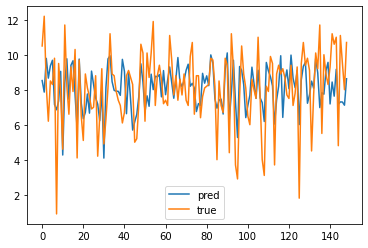

In [84]:
import matplotlib.pyplot as plt
fit_train1 = sm.OLS(train_y,train_x)
fit_train1 = fit_train1.fit()

# 검증데이터에 대한 예측값과 true값 비교

plt.plot(np.array(fit_train1.predict(test_x)),label = "pred")
plt.plot(np.array(test_y),label = "true")
plt.legend()
plt.show() # 잘 적함되지않음을 확인 할 수있다 

In [85]:
fit_train1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            총자외선지수 일최고값   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     14.47
Date:                Tue, 02 Aug 2022   Prob (F-statistic):           8.54e-20
Time:                        18:02:01   Log-Likelihood:                -714.93
No. Observations:                 346   AIC:                             1450.
Df Residuals:                     336   BIC:                             1488.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.6516      0.636     10.452      0.000       5.400       7.903
11시강수확률        -0.0061      0.009     -0.668      0.504      -0.024       0.012
14시강수확률        -0.0198      0.008     -2.348      0.019      -0.036      -0.003
14시최저기온         0.1606      0.026      6.282      0.000       0.110       0.211
평균 오존전량(DU)     0.0034      0.001      3.684      0.000       0.002       0.005
미세먼지_10        -0.0018      0.006     -0.330      0.742      -0.013       0.009
미세먼지_13        -0.0111      0.006     -1.939      0.053      -0.022       0.000
운량_10          -0.0661      0.048     -1.385      0.167      -0.160       0.028
운량_14          -0.1503      0.051     -2.970      0.003      -0.250      -0.051
하루누적 미세먼지량     -0.0007      0.001     -0.853      0.394      -0.002       0.001
==============================================================================
Omnibus:                        4.231   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.121   Jarque-Bera (JB):                3.972
Skew:                           0.252   Prob(JB):                        0.137
Kurtosis:                       3.148   Cond. No.                     2.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
#시계열분석 : 132 안면도 자료 
za_df =pd.read_csv("onlyza.csv",encoding='UTF-8')

In [87]:
za_df['date'] = pd.to_datetime(za_df['date'])
za_df

,date,uv
0,2012-05-01,8.0
1,2012-05-02,11.6
2,2012-05-03,9.4
3,2012-05-04,10.3
4,2012-05-05,8.2
...,...,...
760,2016-09-26,8.1
761,2016-09-27,NaN
762,2016-09-28,NaN
763,2016-09-29,NaN


In [88]:
za_df.set_index('date', inplace=True)
za_df.index

DatetimeIndex(['2012-05-01', '2012-05-02', '2012-05-03', '2012-05-04',
               '2012-05-05', '2012-05-06', '2012-05-07', '2012-05-08',
               '2012-05-09', '2012-05-10',
               ...
               '2016-09-21', '2016-09-22', '2016-09-23', '2016-09-24',
               '2016-09-25', '2016-09-26', '2016-09-27', '2016-09-28',
               '2016-09-29', '2016-09-30'],
              dtype='datetime64[ns]', name='date', length=765, freq=None)

In [89]:
data_freq = za_df.asfreq('D')
data_freq.index

DatetimeIndex(['2012-05-01', '2012-05-02', '2012-05-03', '2012-05-04',
               '2012-05-05', '2012-05-06', '2012-05-07', '2012-05-08',
               '2012-05-09', '2012-05-10',
               ...
               '2016-09-21', '2016-09-22', '2016-09-23', '2016-09-24',
               '2016-09-25', '2016-09-26', '2016-09-27', '2016-09-28',
               '2016-09-29', '2016-09-30'],
              dtype='datetime64[ns]', name='date', length=1614, freq='D')

In [90]:
data_freq = za_df.asfreq('D', method='ffill') #결측값 채우기 forwardfill
data_freq.isnull().sum() 

uv    596
dtype: int64

In [91]:
data_columns = ['uv']
data_weekly_mean = za_df[data_columns].resample('W').mean() # W stands for weekly
data_weekly_mean.head()

,uv
date,
2012-05-06,9.250000
2012-05-13,7.357143
2012-05-20,7.914286
2012-05-27,9.825000
2012-06-03,9.750000


In [92]:
data_columns = ['uv']
data_monthly_max = za_df[data_columns].resample('M').max()
data_monthly_max.head()

,uv
date,
2012-05-31,11.6
2012-06-30,13.4
2012-07-31,13.9
2012-08-31,15.3
2012-09-30,9.7


In [93]:
data_7d_rol = za_df[data_columns].rolling(window=7, center=True).mean()
data_7d_rol.head()
data_365d_rol = za_df[data_columns].rolling(window=365, center=True).mean()


Text(0.5, 1.0, 'forecasting uv')

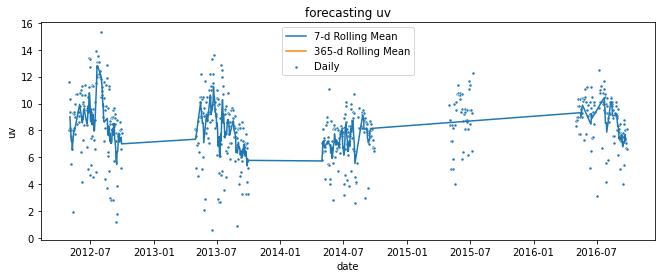

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

fig, ax = plt.subplots(figsize=(11,4))

sns.scatterplot(data=za_df, x='date', y= 'uv', ax=ax, marker='.', label='Daily')
sns.lineplot(data=data_7d_rol, x='date', y= 'uv', ax=ax, label='7-d Rolling Mean')
sns.lineplot(data=data_365d_rol, x='date', y= 'uv', ax=ax, label='365-d Rolling Mean')

#ax.xaxis.set_major_locator(mdates.YearLocator()) # doesn't work
ax.legend()
ax.set_xlabel('date')
ax.set_ylabel('uv')
ax.set_title('forecasting uv')

In [95]:
data_first_order_diff = za_df[data_columns].diff()

data_first_order_diff.head()

,uv
date,
2012-05-01,NaN
2012-05-02,3.6
2012-05-03,-2.2
2012-05-04,0.9
2012-05-05,-2.1


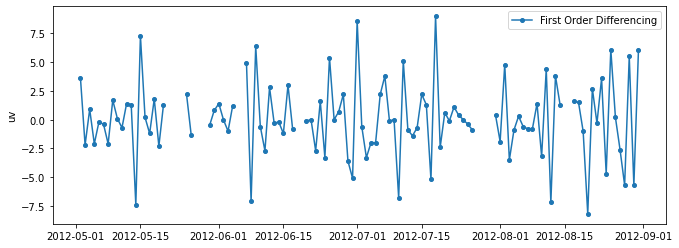

In [96]:
start, end = '2012-05', '2012-08' #1차 차분한결과

fig, ax = plt.subplots(figsize=(11, 4))

ax.plot(data_first_order_diff.loc[start:end, 'uv'],
marker='o', markersize=4, linestyle='-', label='First Order Differencing')
ax.set_ylabel('uv')
ax.legend()

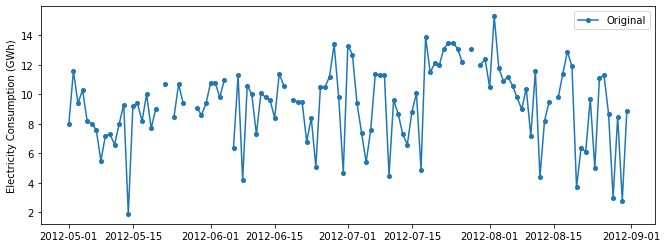

In [97]:
start, end = '2012-05', '2012-08' #2012년 세부 주기파악

fig, ax = plt.subplots(figsize=(11, 4))

ax.plot(za_df.loc[start:end, 'uv'],
marker='o', markersize=4, linestyle='-', label='Original')
ax.set_ylabel('Electricity Consumption (GWh)')
ax.legend()

<AxesSubplot:xlabel='date'>

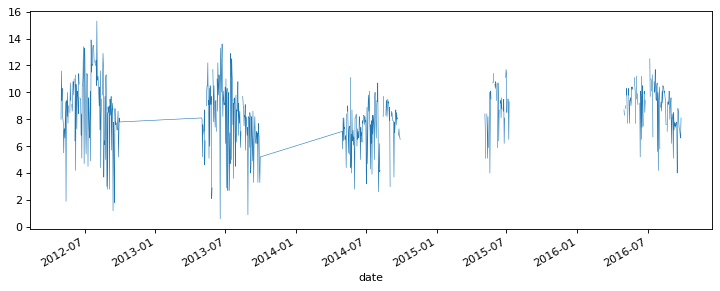

In [98]:
plt.figure(figsize=(11,4), dpi= 80)
za_df['uv'].plot(linewidth = 0.5)

In [99]:
data_consumption = za_df[['uv']]
# Yesterday : 어제의 uv Yesterday_Diff : 이틀 전과 어제의 uv 차이

data_consumption.loc[:,'Yesterday'] = data_consumption.loc[:,'uv'].shift()

# diff는 해당 date와 date - 1의 차이를 반환함
data_consumption.loc[:,'Yesterday_Diff'] = data_consumption.loc[:,'Yesterday'].diff()

data_consumption = data_consumption.dropna()

data_consumption.head()

,uv,Yesterday,Yesterday_Diff
date,,,
2012-05-03,9.4,11.6,3.6
2012-05-04,10.3,9.4,-2.2
2012-05-05,8.2,10.3,0.9
2012-05-06,8.0,8.2,-2.1
2012-05-07,7.6,8.0,-0.2


In [100]:
#시계열 데이터의 Training Set / Test Set 구축 forward chaining strategy사용
X_train = data_consumption[:'2015'].drop(['uv'], axis = 1)
y_train = data_consumption.loc[:'2015', 'uv']

X_test = data_consumption['2016'].drop(['uv'], axis = 1)
y_test = data_consumption.loc['2016', 'uv']

C:\Users\oyj57\AppData\Local\Temp/ipykernel_20448/623117780.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  X_test = data_consumption['2016'].drop(['uv'], axis = 1)


LR: -0.188448 (0.301288)


C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the

NN: -0.262751 (0.354207)
KNN: -0.285574 (0.153599)
RF: -0.466962 (0.272577)
SVR: -0.262844 (0.382892)


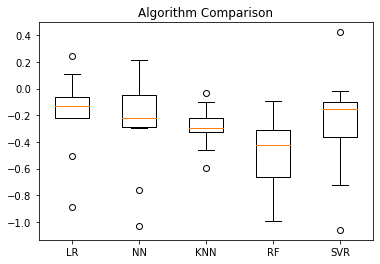

In [101]:
from sklearn.model_selection import TimeSeriesSplit

from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

# 5가지 모델에 대해 결과 비교 
models = []
models.append(('LR', LinearRegression()))
models.append(('NN', MLPRegressor(solver = 'lbfgs')))  #neural network
models.append(('KNN', KNeighborsRegressor())) 
models.append(('RF', RandomForestRegressor(n_estimators = 10))) # Ensemble method -
models.append(('SVR', SVR(gamma='auto'))) # kernel = linear

results = []
names = []
for name, model in models:
    tscv = TimeSeriesSplit(n_splits=10)

    cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()


In [102]:
# Yesterday : 어제의 uv, Yesterday_Diff : 이틀 전과 어제의 uv차이, Yesterday- 1 : 이틀 전의 uv, Yesterday-1_Diff: 이틀 전과 3일 전의 uv 차이

# creating copy of original dataframe
data_consumption_2o = data_consumption.copy()
# inserting column with yesterday-1 values
data_consumption_2o['Yesterday-1'] = data_consumption_2o['Yesterday'].shift()
# inserting column with difference in yesterday-1 and yesterday-2 values.
data_consumption_2o['Yesterday-1_Diff'] = data_consumption_2o['Yesterday-1'].diff()
# dropping NAs
data_consumption_2o = data_consumption_2o.dropna()


data_consumption_2o.tail()


,uv,Yesterday,Yesterday_Diff,Yesterday-1,Yesterday-1_Diff
date,,,,,
2016-09-22,7.3,7.4,-0.6,8.0,-0.5
2016-09-23,7.1,7.3,-0.1,7.4,-0.6
2016-09-24,6.7,7.1,-0.2,7.3,-0.1
2016-09-25,6.6,6.7,-0.4,7.1,-0.2
2016-09-26,8.1,6.6,-0.1,6.7,-0.4


In [103]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4)) # 평균오차 
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

explained_variance:  0.1912
mean_squared_log_error:  0.0286
r2:  0.0792
MAE:  1.206
MSE:  2.2473
RMSE:  1.4991


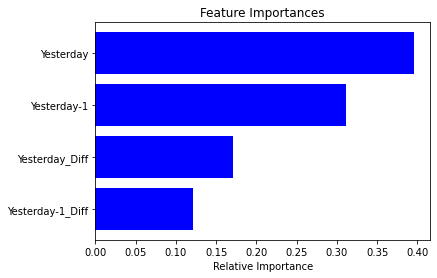

In [160]:
from sklearn.model_selection import TimeSeriesSplit

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
import numpy as np
def rmse(actual, predict):
    predict = np.array(predict)
    actual = np.array(actual)
    distance = predict - actual
    square_distance = distance ** 2
    mean_square_distance = square_distance.mean()
    score = np.sqrt(mean_square_distance)
    return score
rmse_score = make_scorer(rmse, greater_is_better = False)

X_train_2o = data_consumption_2o[:'2015'].drop(['uv'], axis = 1)
y_train_2o = data_consumption_2o.loc[:'2015', 'uv']

X_test = data_consumption_2o.loc['2016'].drop(['uv'], axis = 1)
y_test = data_consumption_2o.loc['2016', 'uv']

model = RandomForestRegressor()
param_search = { 
    'n_estimators': [20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [i for i in range(5,15)]
}
tscv = TimeSeriesSplit(n_splits=4)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = rmse_score)
gsearch.fit(X_train_2o, y_train_2o)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_
y_true = y_test.values
y_pred = best_model.predict(X_test)
regression_results(y_true, y_pred)
imp = best_model.feature_importances_
features = X_train_2o.columns
indices = np.argsort(imp)
plt.title('Feature Importances')
plt.barh(range(len(indices)), imp[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show() #최종모델 

explained_variance:  0.1016
mean_squared_log_error:  0.032
r2:  -0.0424
MAE:  1.2991
MSE:  2.544
RMSE:  1.595


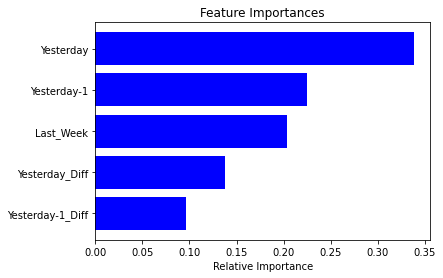

In [144]:

data_consumption_2o_weeklyShift = data_consumption_2o.copy()
data_consumption_2o_weeklyShift['Last_Week'] = data_consumption_2o['uv'].shift(7) #지난주 자외선지수 데이터 추가해서 비교: 결정계수하락  
data_consumption_2o_weeklyShift = data_consumption_2o_weeklyShift.dropna()

X_train_2o = data_consumption_2o_weeklyShift[:'2015'].drop(['uv'], axis = 1)
y_train_2o = data_consumption_2o_weeklyShift.loc[:'2015', 'uv']

X_test = data_consumption_2o_weeklyShift.loc['2016'].drop(['uv'], axis = 1)
y_test = data_consumption_2o_weeklyShift.loc['2016', 'uv']


model = RandomForestRegressor()
param_search = { 
    'n_estimators': [20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [i for i in range(5,15)]
}
tscv = TimeSeriesSplit(n_splits=4)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = rmse_score)
gsearch.fit(X_train_2o, y_train_2o)

best_score = gsearch.best_score_
best_model = gsearch.best_estimator_
y_true = y_test.values
y_pred = best_model.predict(X_test)
regression_results(y_true, y_pred)
imp = best_model.feature_importances_
features = X_train_2o.columns
indices = np.argsort(imp)
plt.title('Feature Importances')
plt.barh(range(len(indices)), imp[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show() 